_____
# **GRADIENT DESCENT**
________

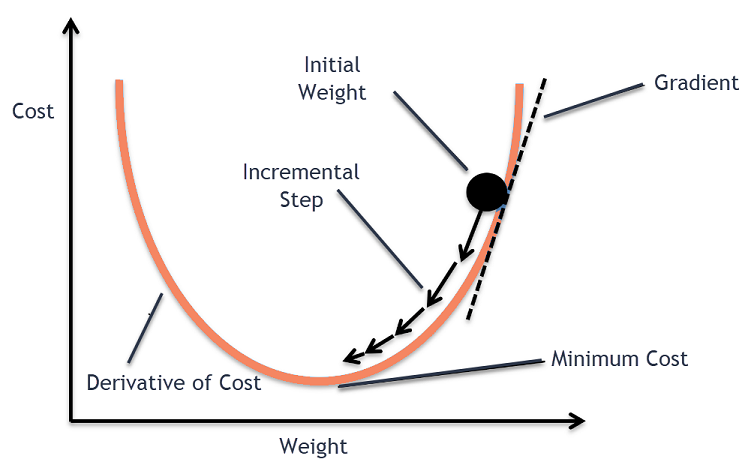

Gradient Descent is an optimization algorithm used to minimize a cost (or loss) function. In supervised learning, we adjust model parameters (like weights in linear regression) to minimize the error between predicted and actual values.


We will train a **linear regression model** to fit:  
$$
\hat{y} = w \cdot x + b
$$  
using **gradient descent** to find the best `w` and `b`.


**Cost function** for linear regression (Mean Squared Error):
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

Where:
- \( \hat{y}^{(i)} = w \cdot x^{(i)} + b \)
- \( m \) is the number of data points

**Gradient descent update rules**:
$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$
$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where \( \alpha \) is the learning rate.



## **Task For this Notebook**

The task for this notebook is to **predict House Prices** using California Housing Dataset.


### Required Libraries

The libraries required to achieve the task of this notebook are:

- **numpy** → Efficient numerical operations for creating and manipulating data, and handling vectorized operations in gradient descent.
- **matplotlib.pyplot** → Create plots and visualizations (e.g., plotting the cost over epochs and model predictions).
- **sklearn.datasets** → Load the **California Housing Dataset** using `fetch_california_housing()`.
- **sklearn.preprocessing** → Standardize the dataset (important for gradient descent convergence) using `StandardScaler`.



### Import Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import fetch_california_housing

### Load Data



In [ ]:
# Load the California housing dataset
california = fetch_california_housing()

# Convert the data to a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

### Data Types and Columns (Data Exploration)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### Data Cleaning

In [11]:
# Number of missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [12]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


### Listing the columns of the data set

The columns in this data set are as follows;

In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

### Initializing the Features and Target

In [16]:
X = california.data
y = california.target

### Standardize the data 

Important for gradient descent to converge


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Initialize Weights

In [21]:
w = np.zeros(X_scaled.shape[1])  # One weight per feature
b = 0

# 4. Gradient descent parameters
learning_rate = 0.01
epochs = 1000
m = len(y)

### Gradient descent parameters


In [22]:
costs = []

for epoch in range(epochs):
    # Predictions
    y_pred = np.dot(X_scaled, w) + b
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    costs.append(cost)
    
    # Gradients
    dw = (1 / m) * np.dot(X_scaled.T, error)
    db = (1 / m) * np.sum(error)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

### Ploting of cost over the epochs

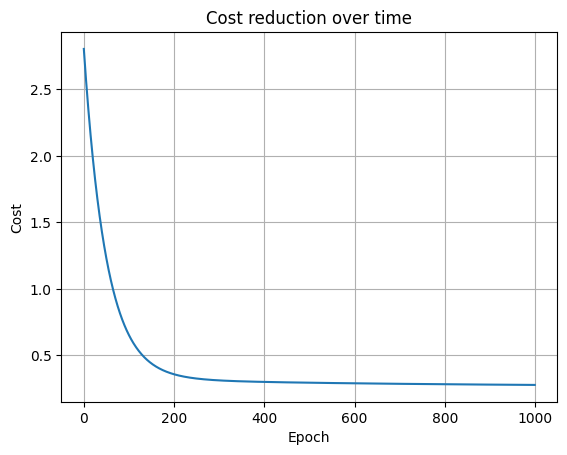

In [23]:
plt.plot(costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost reduction over time")
plt.grid()
plt.show()                 

**Key Observations from the plot:**

- Rapid initial decrease: As the number of epochs grows, the cost experiences a quick fall from its initial high value (over 2.5).  This implies that early on, the model is learning rapidly.

- Slower drop over time: The cost keeps going down across the epochs, but it does so more slowly.

- Flattening trend: The cost stabilizes around 0.5 at epoch 1000, suggesting that the model has almost converged and that further epochs offer minimal improvement.

Models that have been trained should exhibit this pattern.  Significant learning occurs in the early epochs, but improvements become negligible as the model improves.

## **Conclusion of Notebook**

In this notebook, we applied gradient descent to solve the linear regression problem using the California Housing dataset. The steps taken in this notebook allowed us to explore and understand the behavior of the model as it learned to predict house prices based on various features of each district.



- For gradient descent to converge effectively, the data was normalized.

- The cost function showed signs of convergence as it first dropped quickly, then slowed, and then flattened.

- The model demonstrated effective learning at 1000 epochs, when additional training yielded negligible improvement.

- By utilizing gradient descent, we were able to optimize the model parameters and generate predictions based on district characteristics such as housing age and median income.

- This study illustrates the practical application of gradient descent and the significance of data pretreatment for machine learning models.
